In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

Question 1 :

In [239]:
def analyse_composante_principale_kmeans(path_file: str, start_column_data: int, end_column_data: int, n_clusters: int):
    data = pd.read_csv(path_file, sep=';')
    X = data.iloc[:, start_column_data:end_column_data].values
    labels = data.iloc[:, 0].values
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    kmeans = KMeans(n_clusters=n_clusters)
    clustering = kmeans.fit_predict(X_pca[:, :2]) 
    
    colors = ['red','yellow','blue','pink']
    plt.figure(figsize=(12, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
    
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    
    plt.xlabel("Axe 1")
    plt.ylabel("Axe 2")
    plt.title("Projection des villes dans le plan principal avec clustering K-Means")
    plt.show()

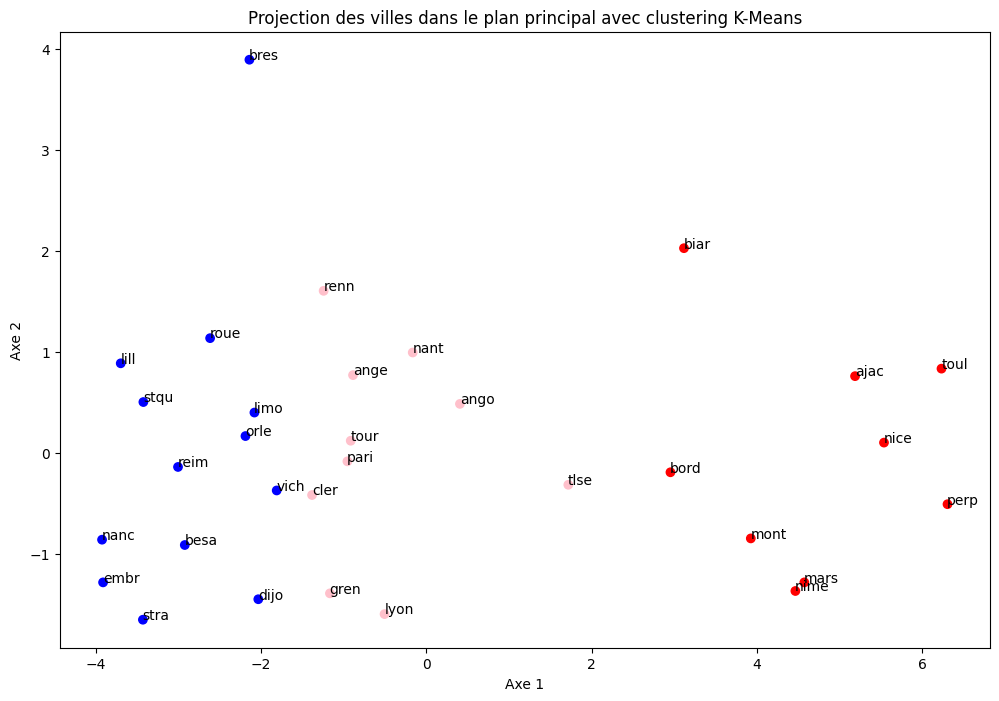

In [240]:
analyse_composante_principale_kmeans('data/villes.csv', 1, 13, 3)

Question 2 :

In [241]:
def analyse_composante_principale_agglomerative_clustering(path_file: str, start_column_data: int, end_column_data: int, n_clusters: int, linkage: str):
    data = pd.read_csv(path_file, sep=';')
    X = data.iloc[:, start_column_data:end_column_data].values
    labels = data.iloc[:, 0].values
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    aggloClust = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    clustering = aggloClust.fit_predict(X_pca[:, :2]) 
    
    colors = ['red','yellow','blue','pink']
    plt.figure(figsize=(12, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
    
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    
    plt.xlabel("Axe 1")
    plt.ylabel("Axe 2")
    plt.title("Projection des villes dans le plan principal avec CAH")
    plt.show()

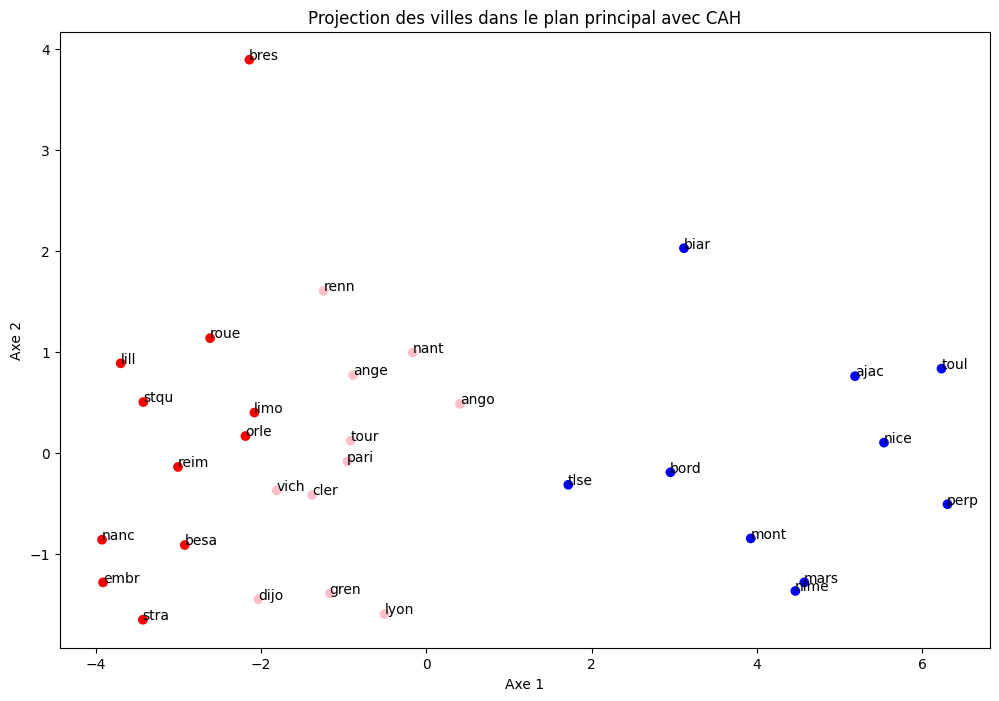

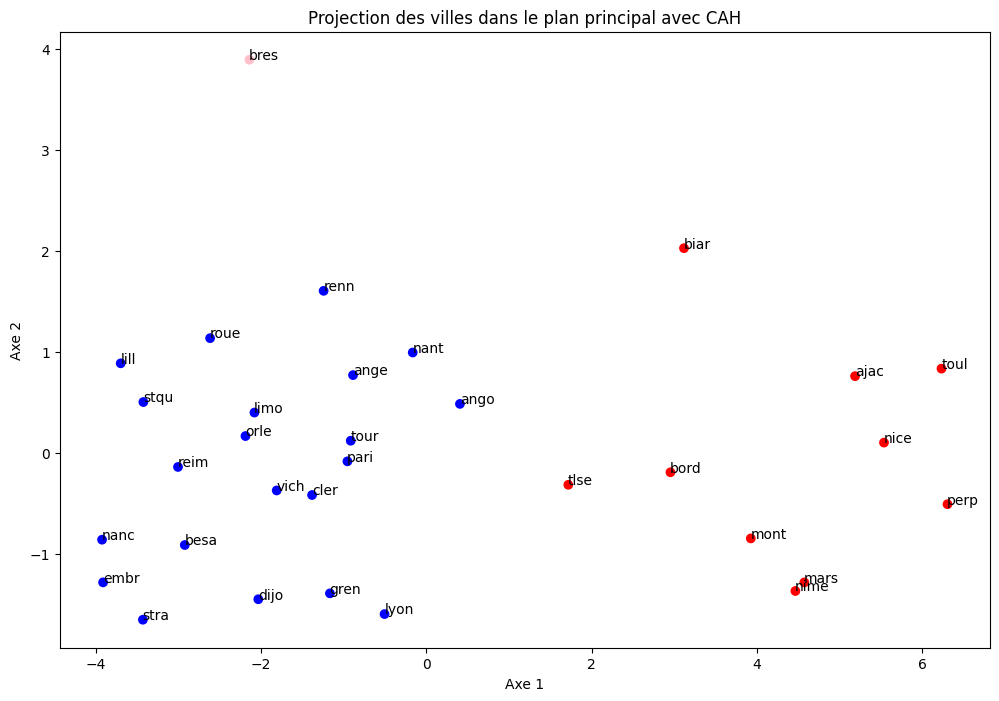

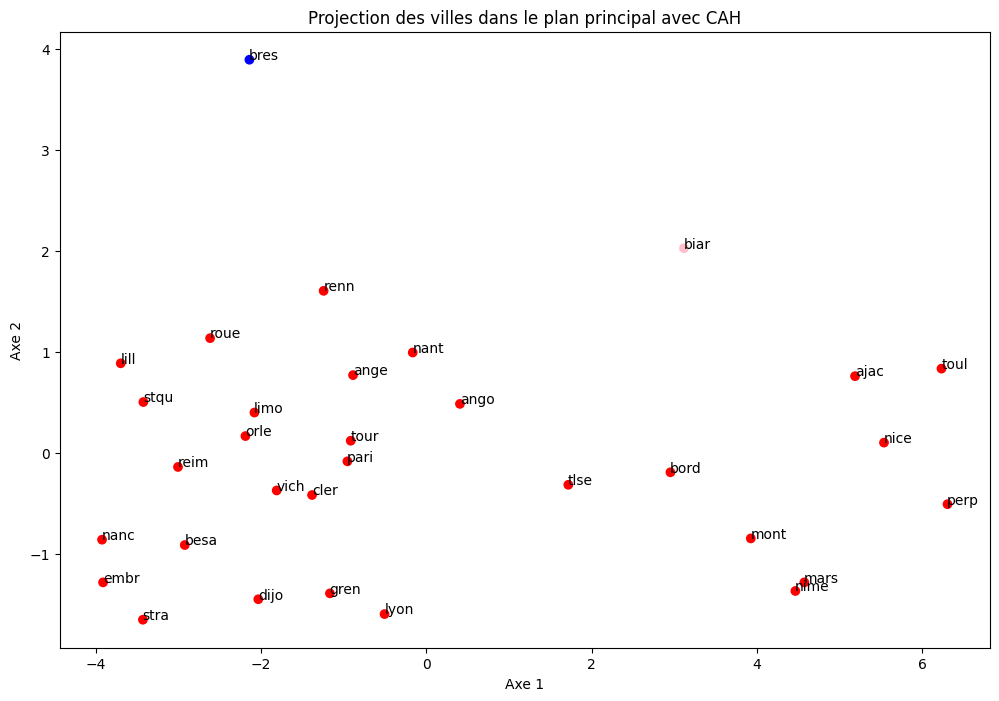

In [242]:
analyse_composante_principale_agglomerative_clustering('data/villes.csv', 1, 13, 3, "ward")
analyse_composante_principale_agglomerative_clustering('data/villes.csv', 1, 13, 3, "average")
analyse_composante_principale_agglomerative_clustering('data/villes.csv', 1, 13, 3, "single")

In [243]:
def silouhette_clusters(path_file: str, start_column_data: int, end_column_data: int):
    data = pd.read_csv(path_file, sep=';')
    X = data.iloc[:, start_column_data:end_column_data].values
    labels = data.iloc[:, 0].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    best_n_clusters = 2
    best_score = -1
    silhouette_scores = []
    
    
    for n_clusters in range(2, 7):
        kmeans = KMeans(n_clusters=n_clusters)
        clustering = kmeans.fit_predict(X_pca[:, :2])
        score = silhouette_score(X_pca[:, :2], clustering)
        silhouette_scores.append(score)
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters
            best_clusetering = clustering
    
    print(f"Meilleur nombre de clusters selon l'indice de Silhouette: {best_n_clusters} avec un score de {best_score}")

    colors = ['red','yellow','blue','pink']
    plt.figure(figsize=(12, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_clusetering, cmap=matplotlib.colors.ListedColormap(colors))
    
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    
    plt.xlabel("Axe 1")
    plt.ylabel("Axe 2")
    plt.title(f"Projection des villes avec la meilleure partition K-Means ({best_n_clusters} clusters)")
    plt.show()

    

Meilleur nombre de clusters selon l'indice de Silhouette: 2 avec un score de 0.6341345030494505


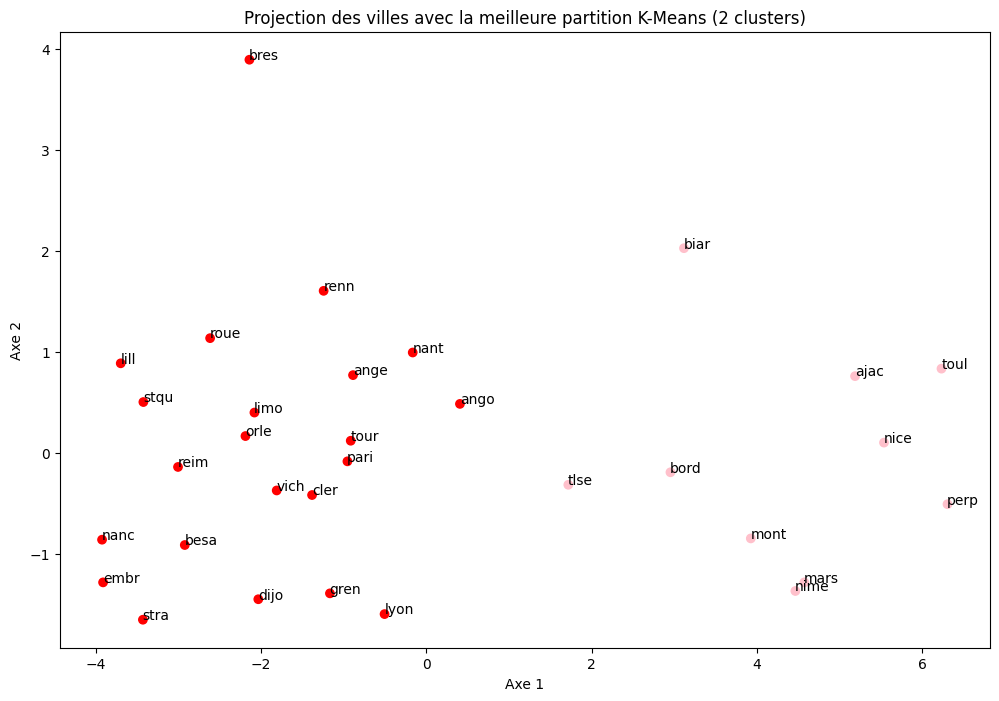

In [244]:
silouhette_clusters('data/villes.csv', 1, 13)